## Задание:
На основе рассмотренного на лекции примера реализуйте следующие алгоритмы:

- SARSA
- Q-обучение
- Двойное Q-обучение

для любой среды обучения с подкреплением (кроме рассмотренной на лекции среды Toy Text / Frozen Lake) из библиотеки Gym (или аналогичной библиотеки).

# Ход выполнения работы

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import gym
from tqdm import tqdm

In [4]:
# ************************************ БАЗОВЫЙ АГЕНТ *****************************************

class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''

    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []


    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)


    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
            # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state 


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])


    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:
            
            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)


    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()


    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass


In [5]:
# ************************************ SARSA *****************************************

class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Выбор действия
            action = self.make_action(state) 

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Выполняем следующее действие 
                next_action = self.make_action(next_state) 
                
                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [6]:
# ************************************ Q-обучение *****************************************

class QLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде 
                action = self.make_action(state) 
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Правило обновления Q для SARSA (для сравнения)
                # self.Q[state][action] = self.Q[state][action] + self.lr * \
                #     (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Правило обновления для Q-обучения
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * np.max(self.Q[next_state]) - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [7]:
# ************************************ Двойное Q-обучение *****************************************

class DoubleQLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Double Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Двойное Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Вторая матрица
        self.Q2 = np.zeros((self.nS, self.nA))
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        temp_q = self.Q[state] + self.Q2[state]
        return np.argmax(temp_q)


    def print_q(self):
        print('Вывод Q-матриц для алгоритма ', self.ALGO_NAME)
        print('Q1')
        print(self.Q)
        print('Q2')
        print(self.Q2)


    def learn(self):
        '''
        Обучение на основе алгоритма Double Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде 
                action = self.make_action(state) 
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    # Обновление первой таблицы
                    self.Q[state][action] = self.Q[state][action] + self.lr * \
                        (rew + self.gamma * self.Q2[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                else:
                    # Обновление второй таблицы
                    self.Q2[state][action] = self.Q2[state][action] + self.lr * \
                        (rew + self.gamma * self.Q[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)


def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('CliffWalking-v0', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


def run_sarsa():
    env = gym.make('CliffWalking-v0')
    agent = SARSA_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = QLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_double_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = DoubleQLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)

Запустим код

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:07<00:00, 2855.25it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ -13.28458418  -12.46793538  -14.22885418  -13.27657094]
 [ -12.45936175  -11.66533596  -13.34660858  -13.45906628]
 [ -11.71638403  -10.88101524  -13.39477295  -12.65541078]
 [ -10.86737962  -10.11829038  -11.93552502  -11.92231622]
 [ -10.07705676   -9.37897128  -11.23305926  -11.06916088]
 [  -9.2474099    -8.4283109   -10.18159789  -10.29406844]
 [  -8.52879815   -7.47575527   -9.32193519   -9.43540966]
 [  -7.55275583   -6.59704964   -8.722669     -8.63843327]
 [  -6.72157012   -5.70996807   -7.58792355   -7.72135969]
 [  -5.75754608   -4.83684192   -5.44219841   -6.86500434]
 [  -4.83800566   -4.03257156   -4.27658203   -5.94011482]
 [  -3.93797347   -3.91535093   -2.9404       -5.0490357 ]
 [ -13.2441641   -13.80960639  -14.87261324  -14.00541517]
 [ -12.42772767  -16.72399429  -20.83693558  -17.26277688]
 [ -11.87122455  -15.62293863  -19.44586793  -19.62173403]
 [ -10.93580195  -14.50285092  -22.48387971  -16.95184528]
 [ -10.1791077   -1

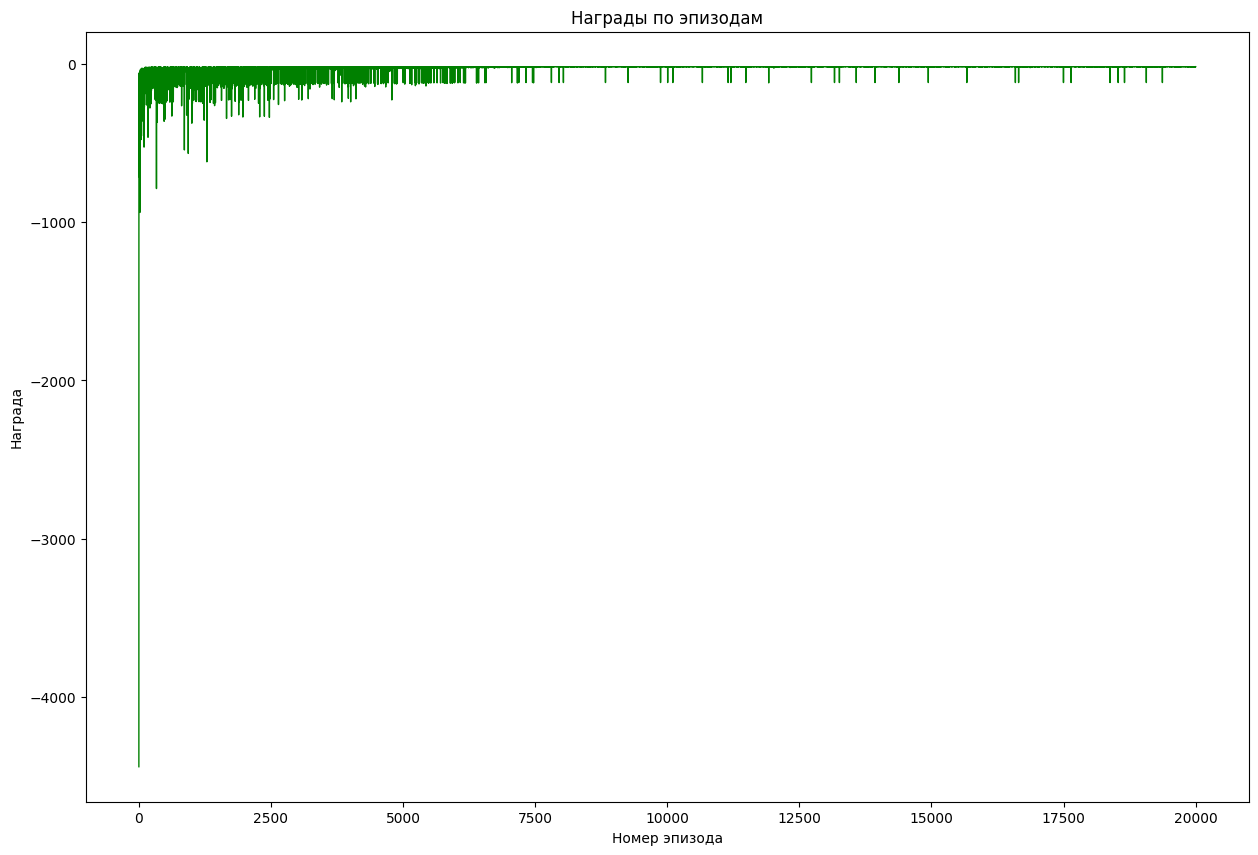

/home/chivarzinae/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [10]:
run_sarsa()

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:07<00:00, 2554.52it/s]


Вывод Q-матрицы для алгоритма  Q-обучение
[[ -12.49766339  -12.31070005  -12.31118573  -12.48057388]
 [ -12.04992222  -11.54861888  -11.54860106  -12.54603438]
 [ -11.46678618  -10.76412877  -10.76412905  -12.16937408]
 [ -10.7141511    -9.96342959   -9.96342936  -11.46688772]
 [  -9.93713951   -9.14635911   -9.14635906  -10.68894613]
 [  -9.11813207   -8.31261184   -8.31261185   -9.94427009]
 [  -8.29806773   -7.46184886   -7.46184886   -9.13158981]
 [  -7.45170816   -6.59372334   -6.59372334   -8.28755561]
 [  -6.59019291   -5.70788096   -5.70788096   -7.45437305]
 [  -5.69600763   -4.80396016   -4.80396016   -6.5784164 ]
 [  -4.7856999    -3.881592     -3.881592     -5.66666797]
 [  -3.87170624   -3.85779722   -2.9404       -4.75994889]
 [ -13.05646141  -11.54888054  -11.54888054  -12.31788719]
 [ -12.31703959  -10.76416381  -10.76416381  -12.31790068]
 [ -11.54871861   -9.96343246   -9.96343246  -11.54888039]
 [ -10.76415436   -9.14635966   -9.14635966  -10.76416381]
 [  -9.9634257

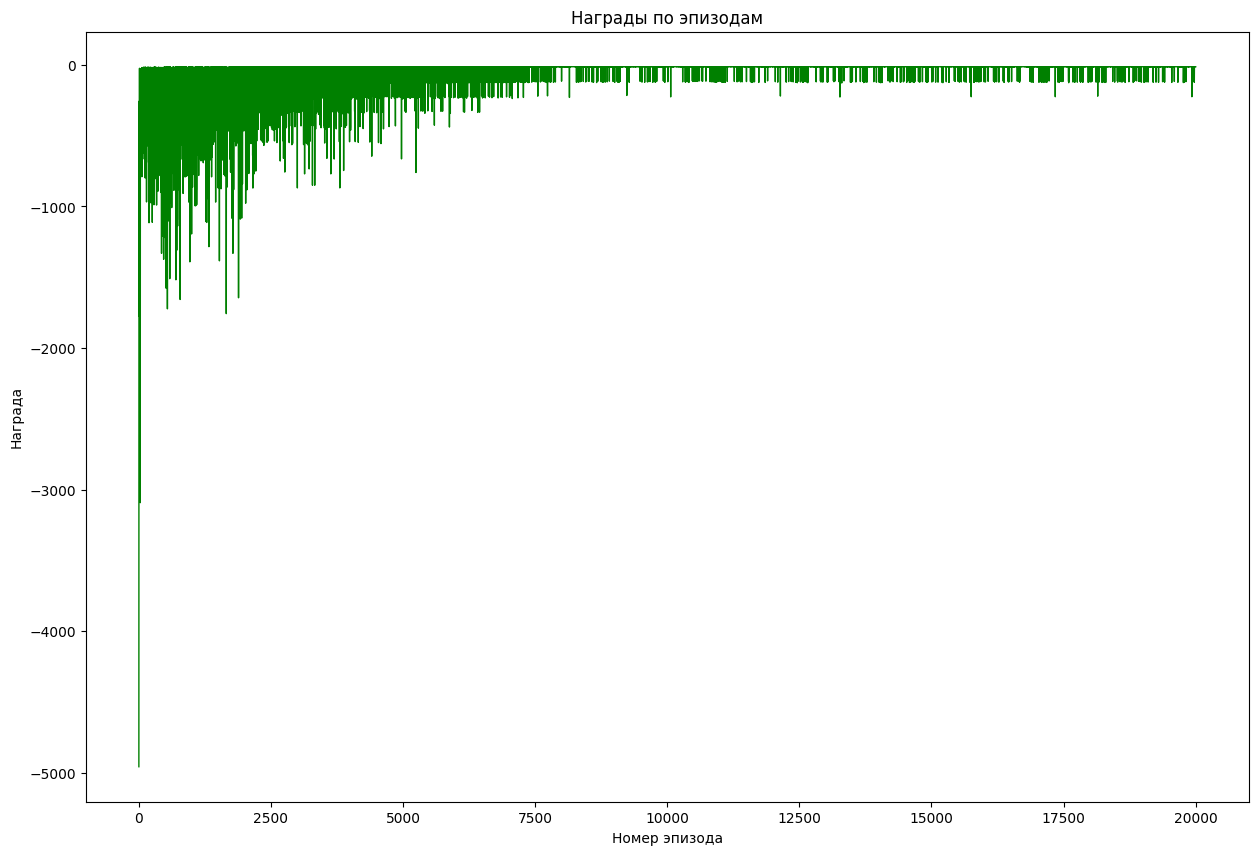

In [12]:
run_q_learning()

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:06<00:00, 2969.40it/s]


Вывод Q-матриц для алгоритма  Двойное Q-обучение
Q1
[[ -22.37789595  -25.62062474  -12.39039485  -24.71573578]
 [ -24.1091759   -24.49194872  -11.98006061  -22.78512369]
 [ -22.62859519  -18.15277024  -10.84750376  -22.53090117]
 [ -16.84208179  -10.22899569  -22.63069044  -24.14874837]
 [ -14.79470827  -11.09195446   -9.16553957  -15.00128277]
 [ -13.9227748   -13.76944309   -8.32878493  -13.03514537]
 [ -13.81883274  -13.09098109   -7.81537107  -11.41258451]
 [ -11.58672958  -12.4383191   -12.65458447  -11.9771373 ]
 [ -11.24180165   -5.7079225    -5.15213654  -12.2569396 ]
 [  -5.33932226   -4.80396227   -5.66995023  -11.56009641]
 [  -4.76171913   -3.881592     -3.89780229   -5.59064732]
 [  -3.8598237    -3.86727098   -2.9404       -4.71912904]
 [ -13.25958484  -11.61431522  -11.54888054  -12.33181141]
 [ -12.66950945  -10.83529407  -10.76416381  -12.45569165]
 [ -13.88326168  -10.33615197   -9.96343246  -12.20620985]
 [ -12.79966567   -9.7658957    -9.14635966  -10.94037081]
 [ -

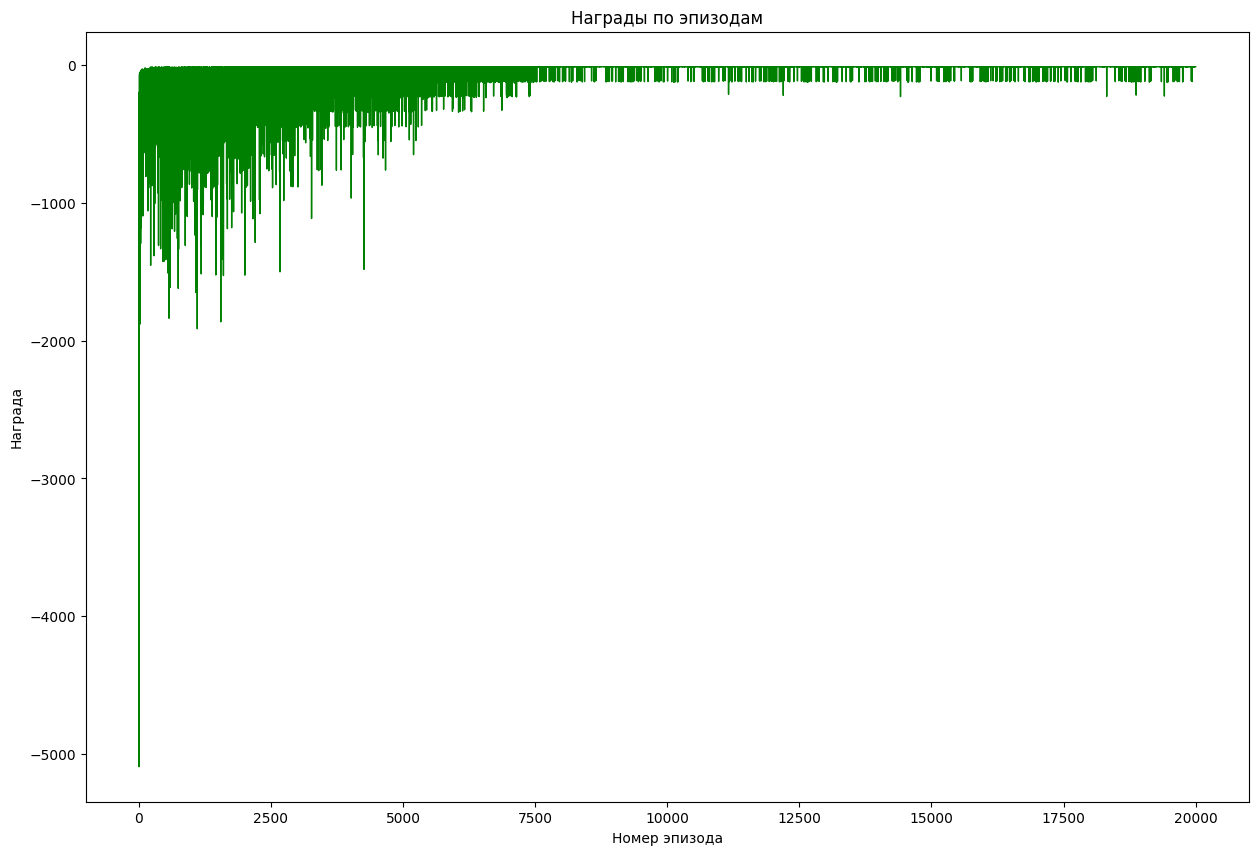

In [11]:
run_double_q_learning()